<a href="https://colab.research.google.com/github/GoutamSachdev/LangGraph/blob/main/FashionGAN_Creator_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install tensorflow  matplotlib tensorflow-datasets ipywidgets

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [40]:
ds=tfds.load('fashion_mnist',split='train')
ds.as_numpy_iterator().next()


{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

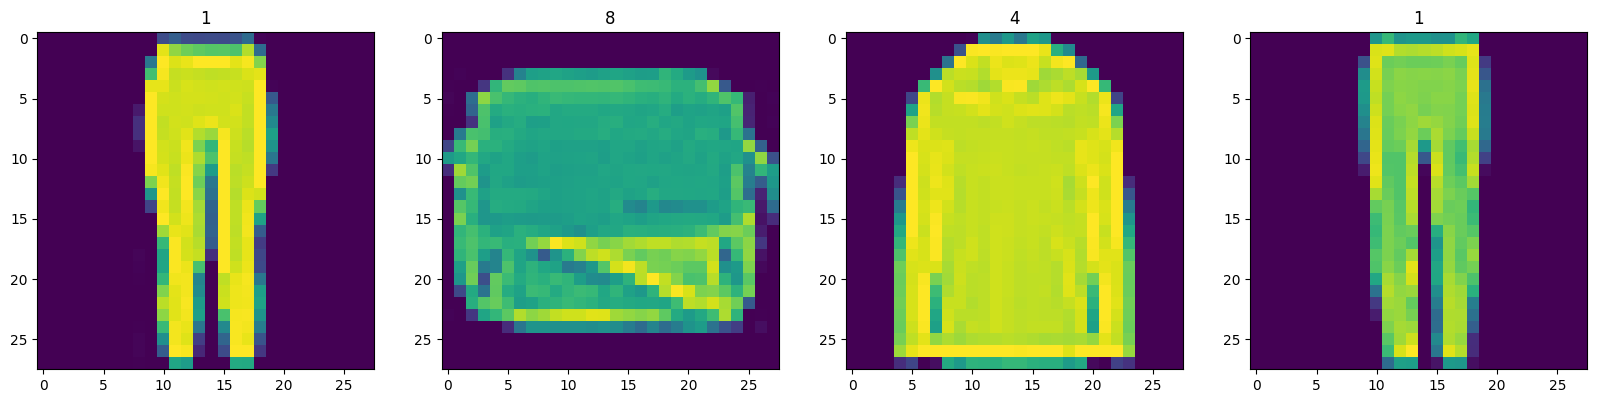

In [41]:
import numpy as np
dataiterator=ds.as_numpy_iterator()
dataiterator.next()
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    data=dataiterator.next()
    ax[idx].imshow(np.squeeze(data['image']))
    ax[idx].title.set_text(data['label'])


In [42]:
def scale_images(data):
  image=data['image']
  return image/255


In [43]:
ds=tfds.load('fashion_mnist',split='train')
ds=ds.map(scale_images)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

In [44]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D


In [46]:
def build_generator():
  model= Sequential()
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))


  model.add(UpSampling2D())
  model.add(Conv2D(128,kernel_size=5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,kernel_size=5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(64,kernel_size=4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(64,kernel_size=4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,kernel_size=4,padding='same',activation='sigmoid'))


  return model

In [47]:
test_model=build_generator()
test_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 1)           │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,826,305 (6.97 MB)

 Trainable params: 1,826,305 (6.97 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
img=test_model.predict(np.random.randn(4,128,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


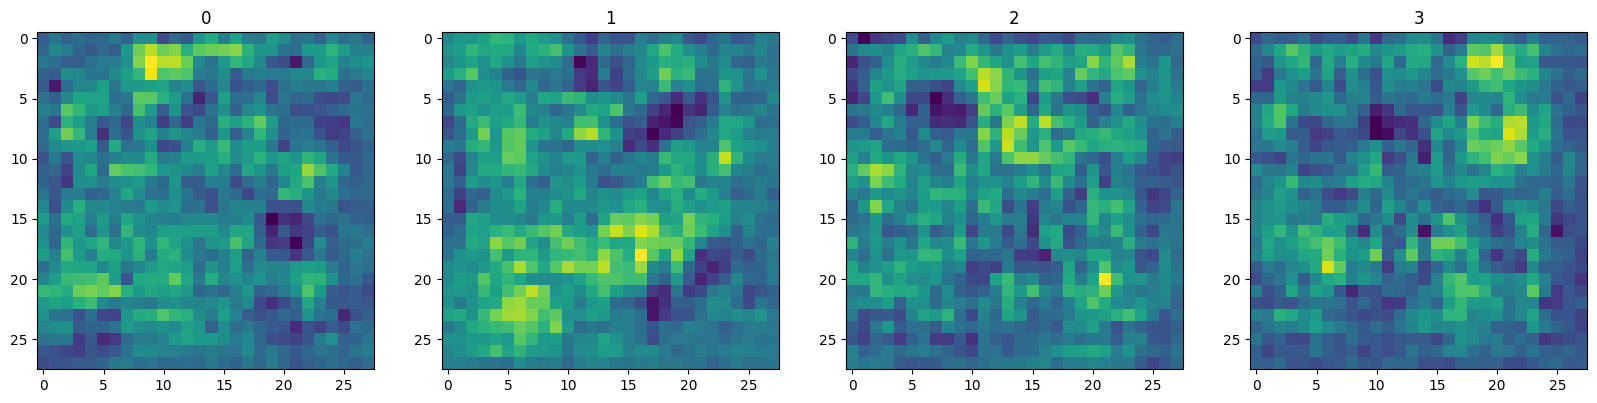

In [49]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(img):
    ax[idx].imshow(img.reshape(28,28)) # Reshape to 2D before displaying
    ax[idx].title.set_text(idx)

In [50]:
def build_discrimanator():
    model=Sequential()
    model.add(Conv2D(32,5,input_shape=(28,28,1),padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64,5,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(256,5,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))



    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))



    return model

In [51]:
img=test_model.predict(np.random.randn(4,128,1))
img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


(4, 28, 28, 1)

In [52]:
discr= build_discrimanator()
discr.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │         200,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,277,185 (4.87 MB)

 Trainable params: 1,277,185 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
discr.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


array([[0.5088685 ],
       [0.50882006],
       [0.5087104 ],
       [0.50864315]], dtype=float32)

In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [55]:
g_optimizer=Adam(learning_rate=0.0002)
d_optimizer=Adam(learning_rate=0.0002)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [56]:
tf.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[-1.64868817e-01],
        [ 2.86097318e-01],
        [ 5.27122796e-01],
        [-6.64642975e-02],
        [ 1.34825245e-01],
        [ 1.50061712e-01],
        [ 9.53025445e-02],
        [-1.12787640e+00],
        [ 9.46715176e-02],
        [ 1.13244027e-01],
        [ 5.30699074e-01],
        [-2.18708091e-03],
        [-2.06034923e+00],
        [-2.51281410e-01],
        [ 3.18605334e-01],
        [ 1.56435400e-01],
        [ 1.08776800e-01],
        [-7.08798766e-01],
        [ 1.65852606e+00],
        [-1.25419724e+00],
        [ 8.26746449e-02],
        [ 2.76070148e-01],
        [ 1.39010489e+00],
        [ 6.84261858e-01],
        [-6.39033198e-01],
        [ 8.67355093e-02],
        [ 1.93192089e+00],
        [ 1.92744181e-01],
        [-8.93044770e-02],
        [ 1.42865396e+00],
        [-2.98770380e+00],
        [-4.38605696e-01],
        [ 1.55434430e+00],
        [-1.74986875e+00],
        [-3.90611500e-01],
  

In [57]:
from tensorflow.keras.models import Model
class FashionGAN(Model):
    def __init__(self,generator,discriminator,*args ,**kwargs) :
        super().__init__(*args ,**kwargs)
        self.generator=generator
        self.discriminator=discriminator
    def compile(self,g_optimizer,d_optimizer,g_loss,d_loss,*args ,**kwargs):
        super().compile(*args ,**kwargs)
        self.g_optimizer=g_optimizer
        self.d_optimizer=d_optimizer
        self.g_loss=g_loss
        self.d_loss=d_loss

    def train_step(self,batch):
        real_images=batch
        fake_image=self.generator(tf.random.normal((128,128,1)),training=False)


        with tf.GradientTape()  as d_tape:
            real_output=self.discriminator(real_images,training=True)
            fake_output=self.discriminator(fake_image,training=True)
            realFake_out=tf.concat([real_output,fake_output],axis=0)

            y_realFake_labels=tf.concat([tf.ones_like(real_output),tf.zeros_like(fake_output)],axis=0)

            noise_real=0.15*tf.random.uniform(tf.shape(real_output))
            noise_fake=-0.15*tf.random.uniform(tf.shape(fake_output))
            y_realFake_labels += tf.concat([noise_real,noise_fake],axis=0)


            total_loss_d=self.d_loss(y_realFake_labels,realFake_out)


        d_grad=d_tape.gradient(total_loss_d,self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(d_grad,self.discriminator.trainable_variables))

        with tf.GradientTape() as g_tape:
            gener_image=self.generator(tf.random.normal((128,128,1)),training=True)

            predicted_labels = self.discriminator(gener_image,training=False)

            total_loss_g=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

        ggrad=g_tape.gradient(total_loss_g,self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(ggrad,self.generator.trainable_variables))



        return {"d_loss":total_loss_d,"g_loss":total_loss_g,}


In [58]:
fashGen=FashionGAN(test_model,discr)
fashGen.compile(g_optimizer,d_optimizer,g_loss,d_loss)

In [59]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images =  self.model.generator(random_latent_vectors) # Use self.model.generator
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [62]:
with tf.device('/gpu:0'):
    fashGen = FashionGAN(test_model, discr)
    fashGen.compile(g_optimizer, d_optimizer, g_loss, d_loss)
    hist = fashGen.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 322ms/step - d_loss: -1.2017 - g_loss: 4.5681e-17
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 298ms/step - d_loss: -1.2014 - g_loss: 0.0000e+00
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 298ms/step - d_loss: -1.2020 - g_loss: 0.0000e+00
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 298ms/step - d_loss: -1.2033 - g_loss: 0.0000e+00
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 298ms/step - d_loss: -1.2013 - g_loss: 0.0000e+00
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 298ms/step - d_loss: -1.2022 - g_loss: 0.0000e+00
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 298ms/step - d_loss: -1.2047 - g_loss: 0.0000e+00
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 298ms/step - d_loss: -1.2040 - g_loss: 0.0000e+00
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 297ms/step - d_loss: -1.2027 - g_loss: 0.0000e+00
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 297ms/step - d_loss: -1.2050 - g_loss: 0.0000e+00
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 298

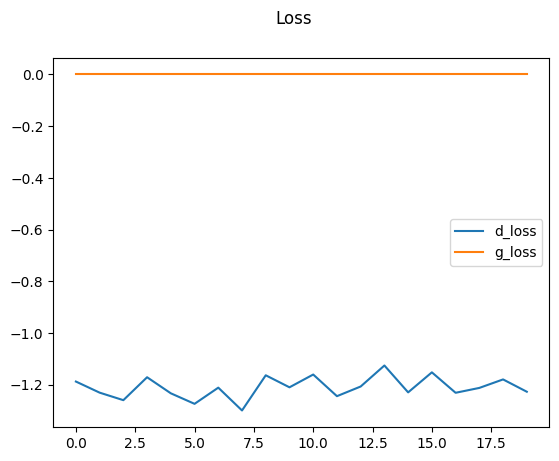

In [63]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()